<a href="https://colab.research.google.com/github/cibelerusso/Aprendizado_de_Maquina/blob/main/Codigos%20em%20Python/PIPGES/Redes_neurais_classifica%C3%A7%C3%A3o_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprendizado de Máquina Estatístico

### por Cibele Russo

### ICMC/USP - São Carlos SP

## Redes neurais artificiais para classificação em k classes

### Redes neurais artificiais para classificação em k classes

Função de ativação 
$\text{softmax}(z)_j = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}, j=1,\ldots,K$, em que K é o número de classes da variável qualitativa de resposta.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Carregando o conjunto de dados MNIST
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Pré-processamento dos dados
x_train, x_test = x_train / 255.0, x_test / 255.0


2023-10-31 14:49:30.761969: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-31 14:49:30.765050: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/google/chrome:/opt/google/chrome/lib
2023-10-31 14:49:30.765061: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
x_train, y_train

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],


In [3]:
28*28

784

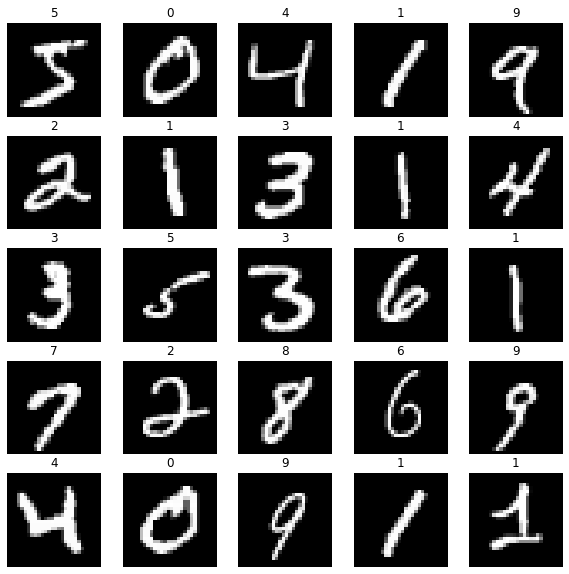

In [4]:
# Visualizando uma amostra dos dados de treinamento
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()

In [5]:
# Visualizando uma amostra dos dados de teste

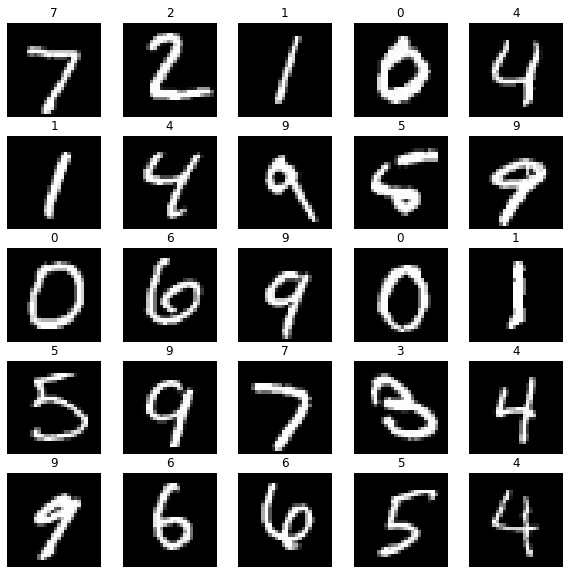

In [6]:
# Visualizando uma amostra dos dados de teste
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(str(y_test[i]))
    plt.axis('off')
plt.show()

In [7]:
# Criando o modelo da rede neural
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

# Compilando o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo e registrando a acurácia
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10


2023-10-31 14:49:33.178497: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/google/chrome:/opt/google/chrome/lib
2023-10-31 14:49:33.178523: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-31 14:49:33.178540: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sme-a054728): /proc/driver/nvidia/version does not exist
2023-10-31 14:49:33.178863: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1875/1875 [==============================] - 2s 853us/step - loss: 0.3538 - accuracy: 0.8960 - val_loss: 0.1511 - val_accuracy: 0.9520
Epoch 2/10
1875/1875 [==============================] - 2s 808us/step - loss: 0.1891 - accuracy: 0.9446 - val_loss: 0.1099 - val_accuracy: 0.9651
Epoch 3/10
1875/1875 [==============================] - 2s 810us/step - loss: 0.1496 - accuracy: 0.9555 - val_loss: 0.0937 - val_accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 1s 784us/step - loss: 0.1331 - accuracy: 0.9589 - val_loss: 0.0888 - val_accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 2s 806us/step - loss: 0.1179 - accuracy: 0.9642 - val_loss: 0.0821 - val_accuracy: 0.9736
Epoch 6/10
1875/1875 [==============================] - 2s 840us/step - loss: 0.1093 - accuracy: 0.9661 - val_loss: 0.0836 - val_accuracy: 0.9745
Epoch 7/10
1875/1875 [==============================] - 2s 828us/step - loss: 0.1022 - accuracy: 0.9685 - val_loss: 0.0764 - val_accura

313/313 [==============================] - 0s 631us/step - loss: 0.0729 - accuracy: 0.9782
A precisão no conjunto de teste é: 0.9782000184059143


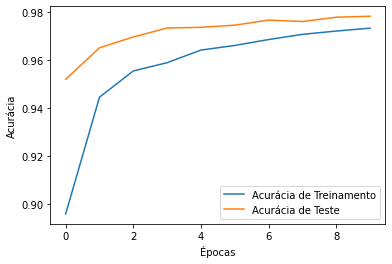

In [8]:

# Avaliando a precisão do modelo nos dados de teste
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'A precisão no conjunto de teste é: {test_acc}')

# Exibindo a acurácia durante o treinamento
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Teste')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()
